In [1]:
import pandas as pd 
import numpy as np
import nltk 
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import scipy.sparse
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sibongiletoure/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [9]:
music_df = pd.read_csv('Flask_app/data/music_recommender.csv')

In [ ]:
music_df = music_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [ ]:
music_df

In [6]:
def mood_recommendations(df,title_id,valence,energy):
    topic = df[df['id']==title_id]['dominant_topic']
    print(topic.item())
    genre = df[df['id']==title_id]['genre']
    genres=[]
    nongenre = []
    
    df = df[df['valence'] >= valence-0.05]
    df = df[df['valence'] <= valence+0.05]
    df = df[df['energy'] >= energy-0.05]
    df = df[df['energy'] <= energy+0.05]
    df = df[df['dominant_topic'] == topic.item()]
    df.reset_index(drop=True,inplace=True)
    for ix,g in enumerate(df.genre):
        if g == genre.item():
            genres.append(ix)
        else:
            nongenre.append(ix)
    songs_in_genre = list(df.loc[genres]['name'])
    artist_in_genre = list(df.loc[genres]['primary_artist'])
    #audio_in_genre = list(df.loc[genres]['audio_preview'])
    ids_in_genre = list(df.loc[genres]['id'])

    songs_non_genre = list(df.loc[nongenre]['name'])
    artist_non_genre = list(df.loc[nongenre]['primary_artist'])
    #audio_in_genre = list(df.loc[nongenre]['audio_preview'])
    ids_non_genre = list(df.loc[nongenre]['id'])
   
    if len(genres) >= 15:
        return songs_in_genre[:16],artist_in_genre[:16],ids_in_genre[:16]
    elif len(genres) > 0 and len(nongenre)>0:
        ## Fix for when no sim genres
        name = songs_in_genre + songs_non_genre
        artist = artist_in_genre + artist_non_genre
        ids = ids_in_genre + ids_non_genre
        return name[:16],artist[:16], ids[:16]
    elif len(genres) > 0 :
        return songs_in_genre,artist_in_genre
    else:
        return songs_non_genre,artist_non_genre

In [8]:
idx = []
for ix,i in enumerate(music_df.id):
    if i in ids:
        idx.append(ix)

NameError: name 'music_df' is not defined

In [5]:
idx

[]

In [180]:
music_audio_df.loc[music_audio_df[ids]]

KeyError: "None of [Index(['442j8VxaB60dWf9cBFuX5w', '6TvxPS4fj4LUdjw2es4g21',\n       '2vSxjnyrWrtxyfzO47EX6q', '3ZoAB9gq2RGW5KdHnRvH75',\n       '0GDQXt7qRJIDDUmcufomrU', '5TvFfDlVoUWZvfqrhTJzD7',\n       '39xy1RYqpC3XjqPq6XrT7c', '14PPUNB4JOzznDNM1w6q7N',\n       '1GdNj9mq8Ix1U40Ppcv2Cr', '6bkOMcBuSjl2cftYa2DrFj',\n       '5UFBEYaigXPoScwPOK4Wft', '0Bo7grcJ9Api986n2RNcA8',\n       '4fb0f72xHM2pFyRDU5M26P', '0R2fpPKRo1qjA9aFnIXwZW',\n       '0r0koSn8v0KSxDd5yOsxpn', '0Si6MQzSdOyfWTy0LP5ojD'],\n      dtype='object')] are in the [columns]"

In [165]:
music_audio_df[music_audio_df['name']=="Bubbly - Acoustic Version"]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,speechiness,tempo,valence,year,lyrics,primary_artist,genres,dominant_topic,genre,audio_preview
12,0.908,['Colbie Caillat'],0.647,216720,0.0985,0,5RMjO7UAJUybWAwZ4t2wKz,0.0,9,0.098,...,0.0619,115.089,0.321,2008,Will you count me in? I've been awake for a w...,Colbie Caillat,"['acoustic pop', 'dance pop', 'neo mellow', 'p...",topic_2,Pop,NaN


In [178]:
name,artsit,sudio,ids = mood_recommendations(music_audio_df,"5RMjO7UAJUybWAwZ4t2wKz",0.3,0.3)

topic_2


In [123]:
music_audio_df[music_audio_df['dominant_topic']=='topic_2']

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,speechiness,tempo,valence,year,lyrics,primary_artist,genres,dominant_topic,genre,audio_preview
0,0.63800,['The Doors'],0.561,203293,0.315,0,6wov6IWJkisFG6rUZIESsB,0.000018,9,0.4930,...,0.0472,97.173,0.432,1967,I can't see your face in my mind I can't see y...,The Doors,"['acid rock', 'album rock', 'classic rock', 'p...",topic_2,Rock,https://p.scdn.co/mp3-preview/8c787f98150938e9...
1,0.01320,['Red Hot Chili Peppers'],0.560,244400,0.209,1,0NSbiBKXoODbsPwjSivfBr,0.551000,7,0.3420,...,0.0390,140.744,0.407,1991,There must be something in the way I feel That...,Red Hot Chili Peppers,"['alternative rock', 'funk metal', 'funk rock'...",topic_2,Rock,https://p.scdn.co/mp3-preview/c6740bcf10353709...
3,0.00298,['NERO'],0.527,268707,0.819,0,7569Hbv0FUS7vjkdGvdgeZ,0.000152,9,0.0606,...,0.0422,140.020,0.143,2011,You got me so wild How can I ever deny You got...,NERO,"['brostep', 'drum and bass', 'edm', 'electro h...",topic_2,None,NaN
5,0.71100,"['Stephen Sondheim', 'Donna McKechnie', 'Susan...",0.730,154533,0.475,0,1gEbqjTPKQnJK9XIdWgBzQ,0.000000,7,0.5860,...,0.1270,97.937,0.808,1970,Bobby Bobby Bobby baby Bobby bubi Robby R...,Stephen Sondheim,"['broadway', 'hollywood', 'show tunes']",topic_2,None,https://p.scdn.co/mp3-preview/16c021ca9fc4dd73...
6,0.72400,"['Christian Borle', 'Laura Bell Bundy']",0.442,253147,0.315,0,7ti94QY6CIjiEEKEqgGRLw,0.000000,11,0.3300,...,0.0874,135.319,0.385,2007,What is this place? It's called... a departme...,Christian Borle,"['broadway', 'hollywood', 'show tunes']",topic_2,None,https://p.scdn.co/mp3-preview/3900c8bac02e1a06...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,0.07920,['Kenny Chesney'],0.656,156200,0.830,0,61MlvRoYHGg1j4OlvzrMTv,0.000957,7,0.3760,...,0.0402,132.907,0.786,1995,A little country church on a two lane road A b...,Kenny Chesney,"['contemporary country', 'country', 'country r...",topic_2,Country,https://p.scdn.co/mp3-preview/79567e5eecfb774c...
29989,0.74700,['Dionne Warwick'],0.669,191307,0.451,0,23J3F8s092auRNmmNQQIJm,0.000000,8,0.1680,...,0.0321,111.284,0.541,1964,Mother told me always to follow the golden rul...,Dionne Warwick,"['adult standards', 'brill building pop', 'dis...",topic_2,Pop,https://p.scdn.co/mp3-preview/67180abd28d9813b...
29991,0.68100,['Jermaine Jackson'],0.713,288720,0.434,0,0QAiTq1vLdg4RfBsOvZ85s,0.000000,1,0.1060,...,0.0275,112.535,0.544,1984,I don't mind Why don't you do what you do When...,Jermaine Jackson,"['disco', 'funk', 'motown', 'post-disco', 'qui...",topic_2,None,https://p.scdn.co/mp3-preview/ba8121c0f80ca8a2...
29994,0.38100,['Ella Fitzgerald'],0.412,169533,0.281,0,4JO1mZtkFQgqka7KwqEzz2,0.000000,1,0.3060,...,0.0562,123.263,0.319,1959,He loves and she loves And they love So why ca...,Ella Fitzgerald,"['adult standards', 'jazz blues', 'swing', 'vo...",topic_2,Blues,NaN


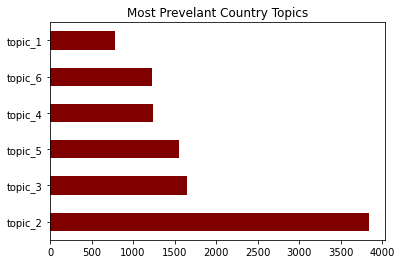

In [216]:
music_audio_df[music_audio_df['genre']=='Pop']['dominant_topic'].value_counts().plot(kind='barh' , color='maroon')
plt.title('Most Prevelant Country Topics');

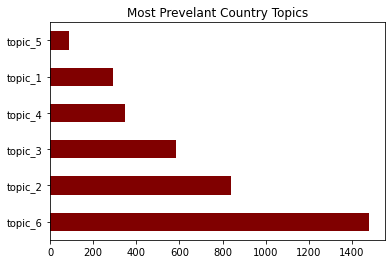

In [212]:
music_audio_df[music_audio_df['genre']=='Country']['dominant_topic'].value_counts().plot(kind='barh',color='maroon')
plt.title('Most Prevelant Country Topics');

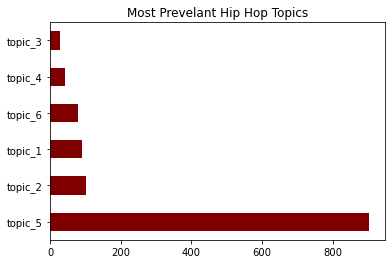

In [213]:
music_audio_df[music_audio_df['genre']=='Hip-Hop']['dominant_topic'].value_counts().plot(kind='barh',color='maroon')
plt.title('Most Prevelant Hip Hop Topics');

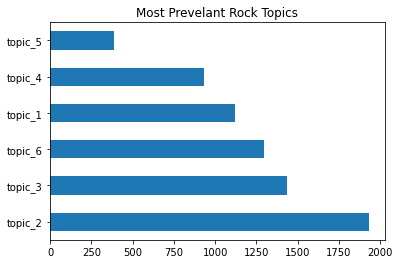

In [199]:
music_audio_df[music_audio_df['genre']=='Rock']['dominant_topic'].value_counts().plot(kind='barh')
plt.title('Most Prevelant Rock Topics');

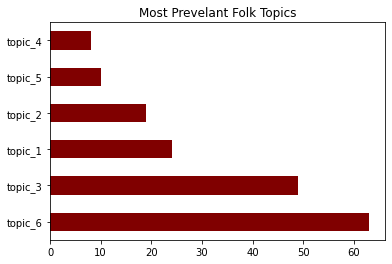

In [214]:
music_audio_df[music_audio_df['genre']=='Folk']['dominant_topic'].value_counts().plot(kind='barh',color='maroon')
plt.title('Most Prevelant Folk Topics');

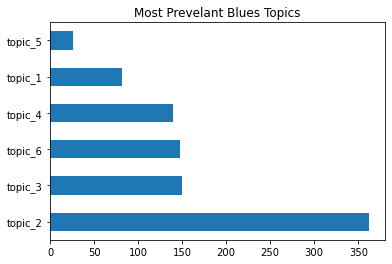

In [201]:
music_df[music_df['genre']=='Blues']['dominant_topic'].value_counts().plot(kind='barh')
plt.title('Most Prevelant Blues Topics');

In [17]:
audio_df

,name,artist,id,audio_preview
0,Lovely,$NOT,4yxFC6hIvXlD1YAtbuxcof,https://p.scdn.co/mp3-preview/27cf5c121f989992...
1,Moon & Stars (feat. Maggie Lindemann),$NOT,3oGbHF3Kdwf3AsRCbBjUxu,https://p.scdn.co/mp3-preview/536c2cb6b4ac01b5...
2,BERETTA (feat. Wifisfuneral),$NOT,0lB24x4SNbi8lLhUAsdoMO,https://p.scdn.co/mp3-preview/f32698d149b32853...
3,Human (feat. Night Lovell),$NOT,4zrYnAzX1CMRt9SoZdixMz,https://p.scdn.co/mp3-preview/8db47c372776ee2b...
4,GOSHA,$NOT,3q8ms2oRMFsyxUYYKDiXIP,https://p.scdn.co/mp3-preview/24a205668bf1c764...
...,...,...,...,...
114146,河上的月色,黃蜀娟,21aYDj43bftxjaoMxd2oCn,https://p.scdn.co/mp3-preview/b43d76a58c1506a1...
114147,空中歌聲,黃蜀娟,7ajHQlyFjoTG8r2kaSEE3e,https://p.scdn.co/mp3-preview/f21928337e568e3b...
114148,含羞草,黃蜀娟,6qHkOXz8z8B8ev7aa4y73x,https://p.scdn.co/mp3-preview/3deefa9c67d6956c...
114149,藍色的月光,黃蜀娟,3enJcaHwRwN3ABPp3Bae35,https://p.scdn.co/mp3-preview/1c92b6f370444436...


## Add audio links to music_df for final recommendations

In [131]:
music_audio_df = pd.merge(music_df,audio_df[['id','audio_preview']],on='id',how='left')

music_df

In [19]:
music_audio_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,speechiness,tempo,valence,year,lyrics,primary_artist,genres,dominant_topic,genre,audio_preview
0,0.63800,['The Doors'],0.561,203293,0.315,0,6wov6IWJkisFG6rUZIESsB,0.000018,9,0.4930,...,0.0472,97.173,0.432,1967,I can't see your face in my mind I can't see y...,The Doors,"['acid rock', 'album rock', 'classic rock', 'p...",topic_2,Rock,https://p.scdn.co/mp3-preview/8c787f98150938e9...
1,0.01320,['Red Hot Chili Peppers'],0.560,244400,0.209,1,0NSbiBKXoODbsPwjSivfBr,0.551000,7,0.3420,...,0.0390,140.744,0.407,1991,There must be something in the way I feel That...,Red Hot Chili Peppers,"['alternative rock', 'funk metal', 'funk rock'...",topic_2,Rock,https://p.scdn.co/mp3-preview/c6740bcf10353709...
2,0.06130,['The Box Tops'],0.668,116173,0.534,0,3j4QPgiDGGipjfLgtikzrL,0.000000,9,0.2960,...,0.0661,138.893,0.930,1967,Gimme a ticket for an aeroplane Ain't got time...,The Box Tops,"['brill building pop', 'bubblegum pop', 'class...",topic_6,Pop,https://p.scdn.co/mp3-preview/9d43ff35165b19a5...
3,0.00298,['NERO'],0.527,268707,0.819,0,7569Hbv0FUS7vjkdGvdgeZ,0.000152,9,0.0606,...,0.0422,140.020,0.143,2011,You got me so wild How can I ever deny You got...,NERO,"['brostep', 'drum and bass', 'edm', 'electro h...",topic_2,None,NaN
4,0.83700,"['Jimmy Smith', 'Kenny Burrell', 'Grady Tate']",0.408,542360,0.236,0,5puI2gKho2X0dWt4gK9zRX,0.658000,0,0.3390,...,0.0365,172.464,0.398,1965,"Uhhhh... Huh Yeah, I kick it root down I put m...",Jimmy Smith,"['bebop', 'contemporary post-bop', 'cool jazz'...",topic_5,Blues,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.33300,['Otis Redding'],0.388,250747,0.307,0,7cRRrFWHzUozebHzVllnIh,0.000010,9,0.6400,...,0.0640,104.892,0.175,1965,"Letra de ""Otis Redding - I've Been Loving You ...",Otis Redding,"['classic soul', 'funk', 'memphis soul', 'soul...",topic_2,Blues,https://p.scdn.co/mp3-preview/e2e6154434b18856...
29996,0.01050,['King Geedorah'],0.423,197133,0.965,1,1R28m5eWk1EV9FQ3puWrUp,0.000010,2,0.2340,...,0.1660,90.564,0.719,2003,Follow the light. The light is your guide I am...,King Geedorah,"['alternative hip hop', 'hardcore hip hop', 'h...",topic_5,Hip-Hop,https://p.scdn.co/mp3-preview/be6470ce99970a3a...
29997,0.00495,['Todd Rundgren'],0.375,174387,0.974,0,7gYEcnIrG2MZsHHlfihStV,0.000000,8,0.0883,...,0.1260,123.638,0.661,1972,Yeah! Hey baby You're on a subliminal trip to ...,Todd Rundgren,"['album rock', 'art rock', 'classic rock', 'co...",topic_4,Pop,https://p.scdn.co/mp3-preview/a7fae1737dbb8e05...
29998,0.48800,['Sting'],0.322,338133,0.438,0,49MxXn7JWgpTjEW6DFF34e,0.159000,0,0.9860,...,0.0300,141.868,0.235,1986,Now that i have found you In the coolth of you...,Sting,"['permanent wave', 'soft rock']",topic_3,Rock,NaN


In [22]:
music_audio_df.to_csv('music_recommender.csv')